In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

mercedes_data=pd.read_csv('Mercedes.csv')


cat_cols=[col for col in mercedes_data.columns if mercedes_data[col].dtype=='object']

target=mercedes_data['y']

mercedes_data.drop(columns='y',inplace=True)

cols_to_drop=[]

for col in mercedes_data.columns:
    if len(np.unique(mercedes_data[col]))== mercedes_data.shape[0] or len(np.unique(mercedes_data[col]))==1:
        cols_to_drop.append(col)

cols_to_drop

mercedes_data.drop(columns=cols_to_drop,inplace=True)

X_train,X_test,y_train,y_test=train_test_split(mercedes_data,target,test_size=0.2,random_state=42)

target.describe()


le=LabelEncoder()



mercedes_data.values

array([['k', 'v', 'at', ..., 0, 0, 0],
       ['k', 't', 'av', ..., 0, 0, 0],
       ['az', 'w', 'n', ..., 0, 0, 0],
       ...,
       ['ak', 'v', 'r', ..., 0, 0, 0],
       ['al', 'r', 'e', ..., 0, 0, 0],
       ['z', 'r', 'ae', ..., 0, 0, 0]], dtype=object)

In [16]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [10]:
train_city=['Hyderabad','Chennai','Amsterdam','Bangalore','Pune','Chennai','Hyderabad']
test_city=['Vizag','Amsterdam','Bangalore','Pune','Hyderabad','Hyderabad','Chennai','Mumbai']

from sklearn.preprocessing import LabelEncoder

le=LabelEncoderExt()

le.fit(train_city)
le.transform(train_city)

le.transform(test_city)

array([5, 0, 1, 4, 3, 3, 2, 5], dtype=int64)

In [25]:
le=LabelEncoderExt()

cat_cols=[col for col in X_train.columns if X_train[col].dtype=='object']
for col in cat_cols:
    le.fit(X_train[col])
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])
    

X_train.values

array([[34, 24, 17, ...,  0,  0,  0],
       [35, 21, 17, ...,  0,  0,  0],
       [27,  5, 33, ...,  0,  0,  0],
       ...,
       [45, 25,  4, ...,  0,  0,  0],
       [45, 20,  9, ...,  0,  0,  0],
       [22,  2,  8, ...,  0,  0,  0]], dtype=int64)

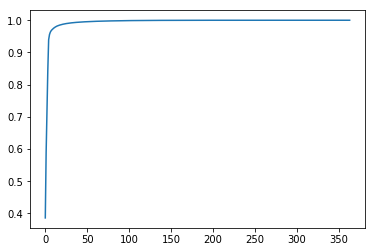

In [43]:
from sklearn.decomposition import  PCA

pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train))

X_train_pca_df

pca.explained_variance_ratio_

plt.plot(np.cumsum(pca.explained_variance_ratio_))

#plt.xlabel('Number of Principal Components')
#plt.ylabel('Explained variance ratio')



In [44]:
pca_1=PCA(n_components=50)

X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train),columns=list(range(0,50)))

X_test_pca_df=pd.DataFrame(pca_1.transform(X_test))

X_train_pca_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.647885,0.387224,1.776482,15.185211,10.427714,-3.292760,2.210504,-1.388151,-1.718944,-0.703580,...,0.573994,0.759857,-0.468638,0.543157,-0.899053,0.025229,-0.376492,-0.079521,-0.312077,-0.023292
1,-3.030171,0.678739,-1.497250,14.052484,5.588574,0.702567,0.305820,-0.862082,-0.855641,1.214414,...,-0.294830,0.118686,-0.223757,1.074012,0.492734,-0.173445,0.417640,0.189704,-0.851735,-0.713560
2,4.636211,13.663241,4.363888,-14.502794,-6.293701,-0.644759,0.771276,0.805485,-2.051963,-2.454510,...,-0.139022,0.139022,-0.700061,-0.104838,0.123083,0.711594,0.087608,-0.290898,0.108768,0.430529
3,-0.837384,10.218992,-6.528297,-8.774082,-6.363953,-0.645039,-0.254889,0.631323,-1.209329,2.637476,...,0.107534,1.101717,-0.260673,-0.515444,-0.708651,-0.330197,-0.205553,-0.035367,-0.106636,-0.526284
4,9.767589,-3.191127,-10.704491,2.846402,-0.890649,-4.603667,1.388254,-0.888473,3.230692,0.820789,...,-0.047542,0.120464,0.211060,0.210023,0.096556,0.309761,-0.142540,0.191428,-0.196559,-0.058257
5,-20.012319,-7.768811,-9.056421,-0.762827,5.041802,-4.024655,-3.539347,1.804053,0.666379,0.587566,...,-0.542323,0.373320,0.171520,0.388424,0.169040,0.213465,0.512869,-0.502316,-0.055740,0.318614
6,-14.078797,-5.645599,15.019051,10.293258,4.454956,-4.912133,-1.672993,2.357973,1.310145,0.837448,...,-0.345154,0.008461,0.313803,-0.259213,0.131841,0.134893,0.298724,-0.250799,0.364930,0.180644
7,-20.121152,-9.899827,-2.881126,-4.226944,-2.293075,6.848465,0.210356,0.585887,0.297792,-0.232878,...,-0.047498,0.175286,-0.106463,0.146933,0.262105,-0.464145,0.094268,-0.049235,-0.087248,0.205341
8,-12.782226,3.164000,-3.941921,17.589149,8.233981,0.805282,-2.365578,-1.364778,1.587870,0.472032,...,-0.114832,-0.114918,-0.465135,0.161588,0.418857,-0.023857,0.290271,0.509729,0.007845,0.062605
9,-4.331655,-9.097365,-11.773194,-3.260224,8.873670,-3.867765,-3.508148,0.791558,0.905942,-0.285434,...,-0.297003,0.232357,0.038543,-0.006049,0.391266,-0.103328,0.115976,0.158904,0.062123,0.285322


In [45]:
# VIF before PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif['Column Name']=X_train.columns

vif

,VIF Factor,Column Name
0,2.675180,X0
1,6.709193,X1
2,19.729722,X2
3,2.896552,X3
4,1.040918,X4
5,1.229887,X5
6,1.295791,X6
7,1.213901,X8
8,inf,X10
9,inf,X12


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_pca = pd.DataFrame()
vif_pca["VIF Factor_PCA"] = [variance_inflation_factor(X_train_pca_df.values, i) for i in range(X_train_pca_df.shape[1])]

vif_pca['Column Name']=X_train_pca_df.columns

vif_pca


,VIF Factor_PCA,Column Name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lin_reg=LinearRegression()

lin_reg.fit(X_train_pca_df,y_train)

y_linreg_pred=lin_reg.predict(X_test_pca_df)

y_linreg_pred


print('R2 Score from SKlearn.metrics:---',r2_score(y_test,y_linreg_pred))
#print('Train Score:----',lin_reg.score(X_train_pca_df,y_train))
print('R2 Score from Linear Regression Class:----',lin_reg.score(X_test_pca_df,y_test))

#mean_squared_error(y_test,y_linreg_pred)

lin_reg.coef_

R2 Score from SKlearn.metrics:--- 0.5367420250655031
R2 Score from Linear Regression Class:---- 0.5367420250655031


array([ 1.62923459e-01,  3.38099699e-02, -1.18763729e-01, -7.89171092e-02,
        6.16535137e-02, -5.70034312e-03,  1.08871127e+00, -2.44423360e+00,
       -4.36111688e-01,  3.53062059e+00,  1.68345251e-02, -3.27615531e+00,
        1.08588874e+00, -2.43703513e+00, -4.11549960e-01,  2.42478498e+00,
       -5.74712166e+00,  7.48242802e-01, -1.04538976e+00,  5.71941042e-01,
       -7.54860227e-01,  1.20634013e+00,  1.59905064e+00,  4.40355289e-01,
        8.19519203e-01,  9.36223938e-01,  2.12748329e-03, -3.07829658e-01,
       -9.13324648e-01,  4.27301006e-01,  4.71937941e-01,  6.53141409e-01,
       -2.39834363e+00,  1.83274085e-01,  1.77028017e-01,  4.31426719e-01,
       -2.85765654e-01, -8.49161809e-02, -2.14043044e-01, -1.28262589e+00,
        5.49207201e-01,  7.41786928e-01,  7.41422521e-01, -1.43919801e+00,
        1.80248874e+00,  4.21502715e-01,  1.03850600e+00,  9.75544853e-01,
        3.12441838e-01,  1.10831467e+00])

In [12]:
import pickle

pickle.dump(lin_reg, open('model.pkl','wb'))


In [33]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=1)
lasso.fit(X_train_pca_df,y_train)
y_lasso_pred=lasso.predict(X_test_pca_df)

lasso.score(X_test_pca_df,y_test)

0.4596831216593199

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

rf=RandomForestRegressor()

hyp_dict={'max_depth':[3,5,8,9],
         'min_samples_split':[3,6,9,10],
         'min_samples_leaf':[4,5,6],
          'n_estimators':range(10,100,10)
         }

grid=GridSearchCV(estimator=rf,param_grid=hyp_dict,cv=5)
grid.fit(X_train_pca_df,y_train)

grid.best_params_
#rf_pred=rf.predict(X_test_pca_df)

{'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 80}

In [41]:
rf_pred=grid.predict(X_test_pca_df)

grid.best_score_

0.5016262106007141